<b><font color="black" size="+4">Тензоры в TensorFlow и операции с ними </font></b>

<b><font color="black" size="+2">By Data Secrets <br>
telegram: [@DataSecrets](https://t.me/+HvSU9GXzgqRmNWY6) </font></b>

## Что такое тензор?

Те́нзор (от лат. tensus, «напряжённый»)— применяемый в математике и физике объект линейной алгебры, заданный на векторном пространстве конечной размерности. Частные случаи тензоров – это скаляр, вектор и матрица.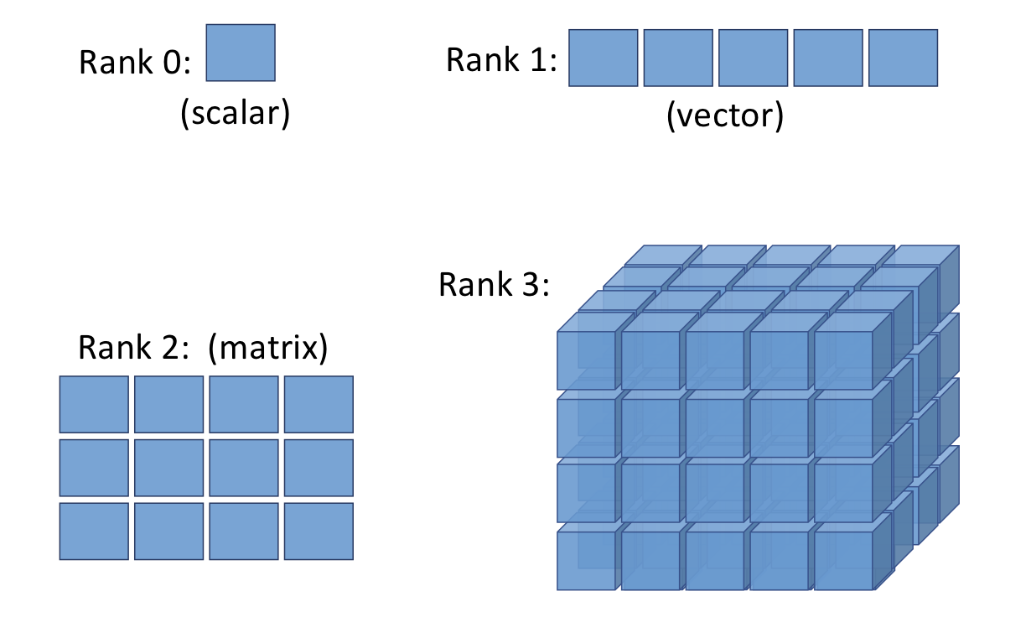

## Устанавливаем TensorFlow

In [ ]:
# ! pip install tensorflow

In [ ]:
import tensorflow as tf
print('TensorFlow version:', tf.__version__)
import numpy as np

np.set_printoptions(precision=3)

TensorFlow version: 2.12.0


## Создаем тензоры

Самый простой способ создать тензор – это создать numpy массив или список и перевести их в тензоры. Вот так:

In [ ]:
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


Обратите внимание, что тензоры – это специальные объекты. Обычные массивы не являются тензорами в терминах ML-программирования.

In [ ]:
tf.is_tensor(a), tf.is_tensor(t_a)

(False, True)

Есть и другие способы создать тензоры. Вот так, например, можно сформировать тензор 2х3 из единиц.

In [ ]:
t_ones = tf.ones((2, 3))

t_ones.shape

TensorShape([2, 3])

In [ ]:
# если хочется посмотреть, как выглядит тензор, пользуйтесь методом numpy() или операцией print()
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

А вот так можно создать тензор из констант без промежуточного шага со списком или np.array():

In [ ]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)

print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


## Изменение shape и data type

По умолчанию тензор хранит вещественные числа. Но это можно поменять. Вот так:

In [ ]:
t_a_new = tf.cast(t_a, tf.int64)

print(t_a_new.dtype)

<dtype: 'int64'>


Еще тензоры можно транспонировать:

In [ ]:
t = tf.random.uniform(shape=(3, 5))

t_tr = tf.transpose(t)
print(t.shape, ' --> ', t_tr.shape)

(3, 5)  -->  (5, 3)


Можно разбивать векторы на тензоры нужных размерностей:

In [ ]:
# эта операция создает тензор из нулей
t = tf.zeros((30,))

t_reshape = tf.reshape(t, shape=(5, 6))

print(t_reshape.shape)

(5, 6)


Вместо разбиения можно наоборот уплощать тензоры по некоторым размерностям:

In [ ]:
t = tf.zeros((1, 2, 1, 4, 1))
print(t)
print()

t_sqz = tf.squeeze(t, axis=(2, 4))
print(t_sqz)
print()

print(t.shape, ' --> ', t_sqz.shape)

tf.Tensor(
[[[[[0.]
    [0.]
    [0.]
    [0.]]]


  [[[0.]
    [0.]
    [0.]
    [0.]]]]], shape=(1, 2, 1, 4, 1), dtype=float32)

tf.Tensor(
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]]], shape=(1, 2, 4), dtype=float32)

(1, 2, 1, 4, 1)  -->  (1, 2, 4)


## Применение математических операций к тензорам

Кроме тензоров из констант можно создавать также тензоры-выборки из случайных величин. Вот примеры с равномерным и нормальным распределением:

In [ ]:
tf.random.set_seed(1)

t1 = tf.random.uniform(shape=(5, 2),
                       minval=-1.0,
                       maxval=1.0)

t2 = tf.random.normal(shape=(5, 2),
                      mean=0.0,
                      stddev=1.0)

Попробуем поэлементно перемножить получившие тензоры (чтобы все получилось, они должны быть одинаковых размерностей):

In [ ]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


Также мы можем посчитать среднее по каждому столбцу тензора (или по любой другой размерности, которую мы укажем в axis):

In [ ]:
t4 = tf.math.reduce_mean(t1, axis=0)

print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


Мы также можем перемножать тензоры в матричном смысле. Чтобы матрицы можно быть перемножить, количество столбцов первой должно совпадать с количеством строк второй. Так что мы транспонируем вторую матрицу с помощью опции transpose_b. Полученная матрица будет размера (кол-во строк матрицы 1)х(кол-во столбцов матрицы 2).

In [ ]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)

print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


Можно, наоборот, транспонировать не вторую, а первую матрицу. Результат будет другой:

In [ ]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)

print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


## Split, stack и concatenate

Тензоры можно разбивать на несколько более мелких с помощью операции split():

In [ ]:
tf.random.set_seed(1)

t = tf.random.uniform((6,))

print(t.numpy())

t_splits = tf.split(t, 3)

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292 0.643]


[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

При этом тензоры, на которые мы бьем главный, не обязательно должны быть одинаковых размерностей:

In [ ]:
tf.random.set_seed(1)
t = tf.random.uniform((5,))

print(t.numpy())

t_splits = tf.split(t, num_or_size_splits=[3, 2])

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292]


[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

Мы можем не только делить тензоры, но и объединять их:

In [ ]:
A = tf.ones((3,))
B = tf.zeros((2,))

C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


Главное не путать объединение с операцией stack():

In [ ]:
A = tf.ones((3,))
B = tf.zeros((3,))

S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


Это были основные способы построения тензоров и главные операции, которые с ними можно производить.

В следующей части посмотрим, как объединять тензоры в датасет, разбивать их на батчи, перемещивать и всякое такое.

Ставьте лайки, нам приятно :)